<span style='font-family:serif'>
    
# <center>$Machine   Learning   From   Scratch$</center>
# <center><span style='background:yellow'> KNN (K-Vizinhos-Mais-Próximos)</span></center>
<center>$Rafael Pavan$</center>



<span style='font-family:serif'>
    
## 1. Introdução

Este notebook irá realizar a formulação matemática do algoritmo KNN, visando classificar automaticamente a espécie de uma flor (Setoda ou Virginica) com base na medida de comprimento e largura de suas pétalas. O algoritmo realiza a classificação de uma amostra com base nas $K$ amostras mais próximas a ela. A proximidade é calculada a partir de uma métrica de distância, geralmente a Euclidiana.

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

<span style='font-family:serif'>
    
## 2. Importando e Pré-Visualizando os Dados


In [13]:
df1 = pd.read_csv('dados.csv', sep=',', index_col=None)

In [14]:
df1.head()

,largura_petala,comprimento_petala,classe
0,4.9,3.1,0
1,4.4,3.0,0
2,5.7,4.4,0
3,5.5,4.2,0
4,4.9,3.1,0


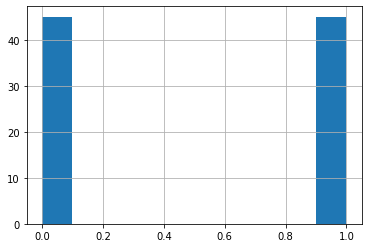

In [15]:
plt.hist(df1.classe)
plt.grid()

In [16]:
X = df1.iloc[:, 0:-1].values

Y = df1.iloc[:, -1].values #TARGET

print('X:', X[0:5,:])

print('Y:', Y[0:5])

X: [[4.9 3.1]
 [4.4 3. ]
 [5.7 4.4]
 [5.5 4.2]
 [4.9 3.1]]
Y: [0 0 0 0 0]


Agora, vamos criar uma função para plotar os dados.

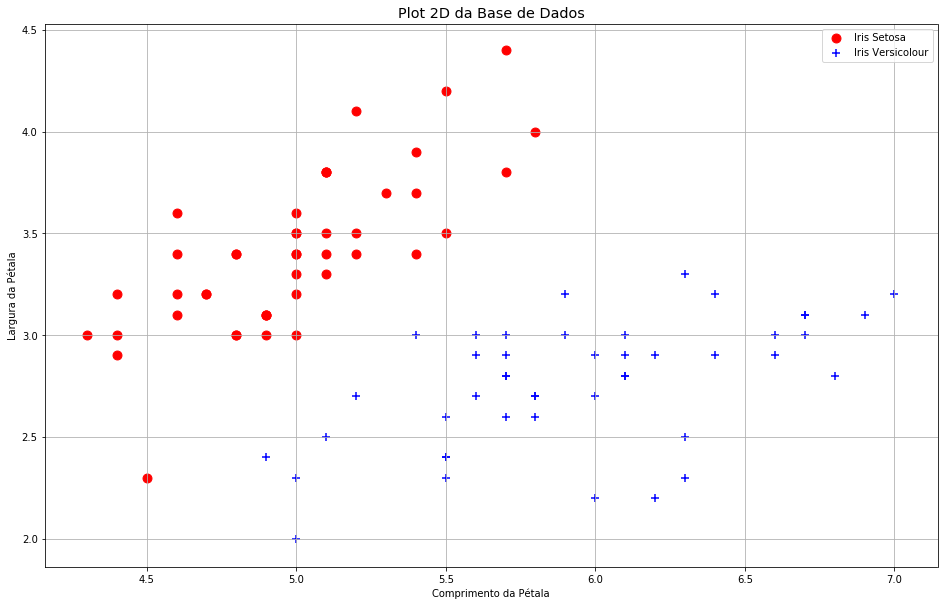

In [17]:
def visualizaDados(X,Y, nome_classe0, nome_classe1):

    """
    Função usada para plotar os dados.
    """

    plt.figure(figsize=(16,10))
    plt.scatter( X[Y==0,0], X[Y==0,1], label=nome_classe0, marker='o', color='red', s=80) 
    plt.scatter( X[Y==1,0], X[Y==1,1], label=nome_classe1, marker='+', color='blue', s=80) 
    plt.xlabel(r'Comprimento da Pétala',fontsize='medium') 
    plt.ylabel(r'Largura da Pétala',fontsize='medium') 
    plt.legend()
    plt.title('Plot 2D da Base de Dados', fontsize='x-large')
    plt.grid()
    
visualizaDados(X,Y, 'Iris Setosa', 'Iris Versicolour')

plt.show()

<span style='font-family:serif'>
    
## 2. Normalização
    
 </span>


<span style='font-family:serif'>
Atributos com escalas diferentes podem gerar um $bias$ na classificação. Assim, devem ser normalizados de forma que a média ($\mu$) seja igual a 0 e desvio padrão ($\sigma$) igual a 1.
    
    
 </span>

<center>$X$Normalizado = ($X$ - $\mu$) / $\sigma$</center>


In [18]:
def normaliza(X):
    """
    Normaliza os atributos.
    
    Entrada: X não normalizado.
    Saída: X normalizado.
    
    """
    
    m, n = X.shape 
    
    X_norm = np.zeros( (m,n) ) 
    
    mu = 0 
    
    sigma = 1
    
    mu = X.mean(axis=0)
    
    sigma = X.std(axis=0,ddof=1)
    
    colu, lin = 0, 0
    
    for colu in range(X.shape[1]):
    
        for lin in range(X.shape[0]):
    
            X_norm[lin,colu]=(X[lin,colu]-mu[colu])/(sigma[colu])   
    
    
    return X_norm, mu, sigma

X_norm, mu, sigma = normaliza(X)

<span style='font-family:serif'>
Caso de teste:
    
 </span>

In [19]:
x_teste = np.array(([[6.5, 3.5]]))

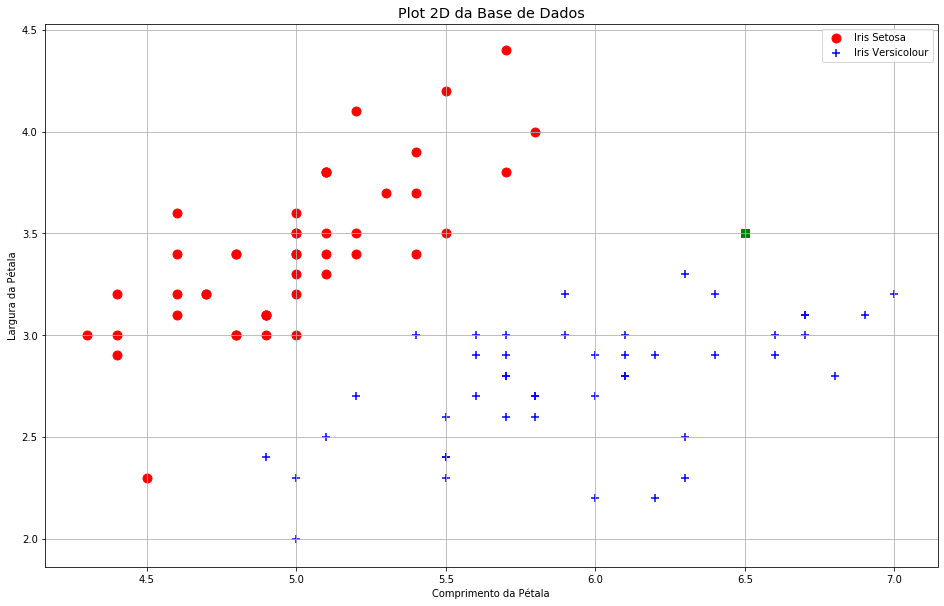

In [20]:
visualizaDados(X,Y, 'Iris Setosa', 'Iris Versicolour')

plt.scatter( x_teste[0,0], x_teste[0,1], marker='s', color='green', s=80)

plt.show()

<span style='font-family:serif'>
Agora, vamos normalizar o caso de teste usando os valores de $\mu$ e $\sigma$ já calculados.
    
</span>

In [21]:
x_teste_norm = (x_teste-mu) / sigma

<span style='font-family:serif'>

## 3. K-Vizinhos-Mais-Próximos

A métrica de distância adotada será a Euclidiana:     $dist(x,y) = \sqrt{\sum_{i=1}^{n} (x_i-y_i)^2}$.

A equação mostrada acima, também pode ser definida da seguinta forma: $dist(x,y) = \left\Vert x-y \right\Vert_2$.

Nas equações mostradas acima, $x$ e $y$ são vetores que possuem a mesma dimensão ($n$).

</span>


In [22]:
def distancia(x, X):
    
    """
    Calcula um vetor de distâncias entre a amostra x e todas as amostras da base X.
    Entrada: x (teste) e X (atributos da base de dados)
    Saídas: D (vetor de distância)
    """
      
    m = X.shape[0]
    D = np.zeros(m)

    
    D1 = np.zeros(m)
    D2 = np.zeros(X.shape)
    Daux=np.zeros(X.shape)
    x_r=x.reshape(-1)

    for p in range(X.shape[1]):
        Daux[:,p] = X[:,p]-x_r[p]
    
    D2 = np.square(Daux)
    D1 = np.sum(D2,axis=1)
    D =  np.sqrt(D1)
    
    
    return D

<span style='font-family:serif'>
Após o cálculo das distâncias, é necessário encontrar os $K$ menores valores de $D$, que correspondem aos vizinhos mais próximos da amostra de teste. 
</span>


In [23]:
def knn(x, X, Y, K):
    
    """
    Parâmetros de entrada:
        -> x : amostra a ser classificada
        -> X : base de dados de treinamento
        -> Y : conjunto de rótulos de cada amostra de X
        -> K : quantidade de vizinhos mais próximos
 
    Parâmetros de saída:
        -> y : predição (0 ou 1) do rótulo da amostra x
        -> ind : índice das K amostras mais próximas de x
                            encontradas em X (da mais próxima para a menos
                            próxima)
    """
    
    y = 0 
    
    ind = np.ones(K, dtype=int) 
        
    dist = distancia(x,X)
    
    ind = np.argsort(dist)[:K]
    
    Ysel = Y[ind]
    
    values, counts = np.unique(Ysel, return_counts=True)
    
    j = counts.argmax()
    
    y=values[j]
    
    return y, ind

<span style='font-family:serif'>
Testando o Algoritmo:
</span>


In [24]:
x_teste = np.array(([[6.5, 3.5]]))

K = 10

x_teste_norm = (x_teste-mu) / sigma

y, ind_viz = knn(x_teste_norm, X_norm, Y, K)

print('Segundo o KNN, a amostra de teste foi classificada como:')

# Imprime a espécie da planta de acordo com o rótulo informado
if y == 0:
    print('\tClasse 0 ==> Iris Versicolour.\n');
else:
    print('\tClasse 1 ==> Iris Setosa.\n');

Segundo o KNN, a amostra de teste foi classificada como:
	Classe 1 ==> Iris Setosa.



<span style='font-family:serif'>
Vamos plotar o(s) vizinho(s) mais próximo(s) usado(s) na classificação:
</span>

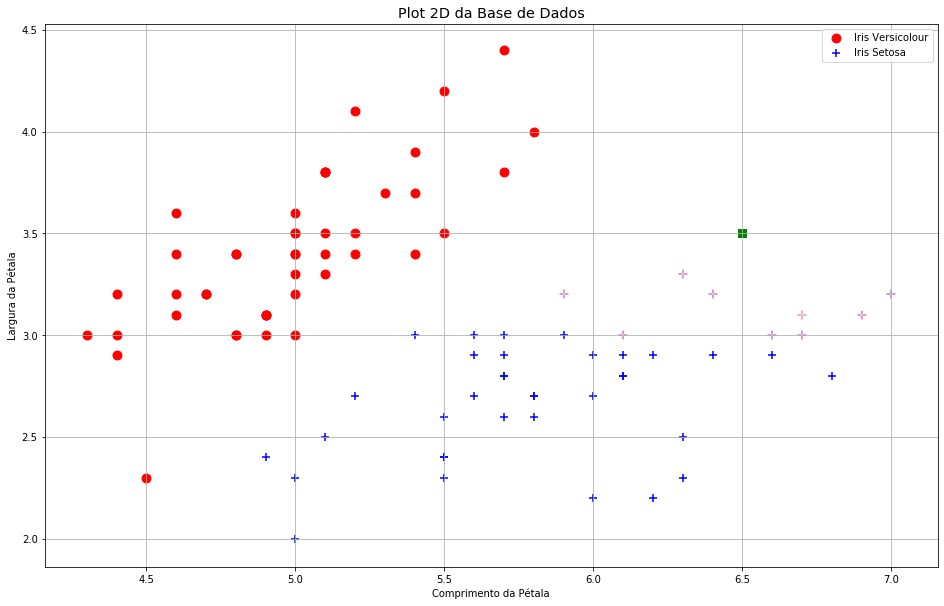

In [26]:
visualizaDados(X,Y, 'Iris Versicolour', 'Iris Setosa')

plt.scatter( x_teste[0,0], x_teste[0,1], marker='s', color='green', s=80)

for i in range(K):
    if Y[ind_viz[i]]==0:
        plt.scatter( X[ind_viz[i],0], X[ind_viz[i],1], label="Iris Versicolour", marker='o', color='orange', s=120)
    else:
        plt.scatter( X[ind_viz[i],0], X[ind_viz[i],1], label="Iris Setosa", marker='+', color='', s=120) 

plt.show()

<span style='font-family:serif'>
Vamos agora analisar a superfície de decisão (K=3):
</span>

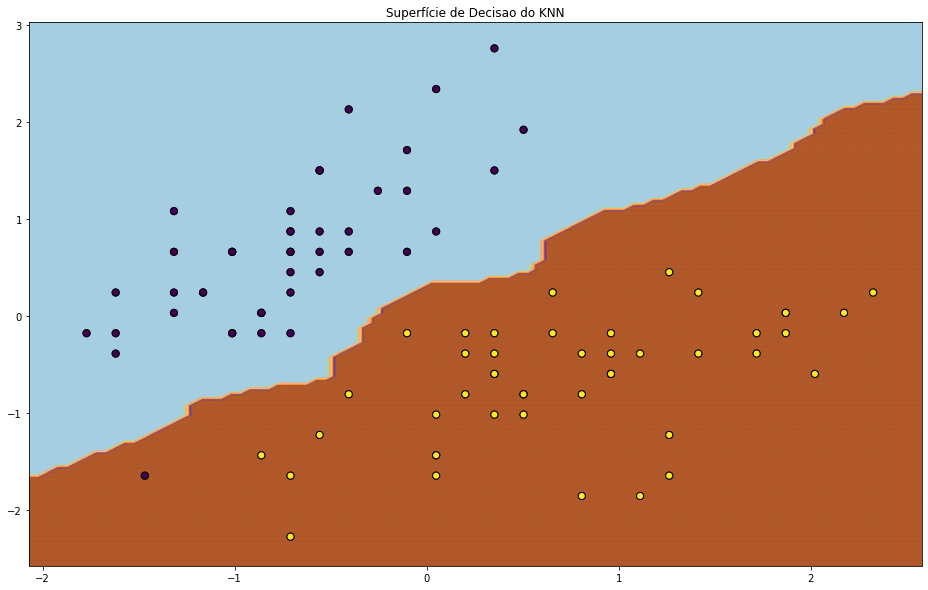

In [29]:
def superficie_decisao(X, Y, K, ax, title = ""):
    
    h = 0.05
        
    x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
        
    y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
      
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_teste = np.c_[xx.ravel(), yy.ravel()] 

    Z = np.zeros( X_teste.shape[0] )
    
    for i in range( X_teste.shape[0] ):

        Z[i], ind_viz = knn(X_teste[i], X, Y, K)

        Z2 = np.unique(Z, return_inverse=True)[1]

        Z2 = Z2.reshape(xx.shape)
        
        ax.contourf(xx, yy, Z2, cmap=plt.cm.Paired, alpha=.4)

        Y2 = np.unique(Y, return_inverse=True)[1]

        ax.scatter(X[:, 0], X[:, 1], c=Y2, edgecolor='k', s=50)

        ax.set_xlim(xx.min(), xx.max())
        
        ax.set_ylim(yy.min(), yy.max())
        
        ax.set_title(title, fontsize='large')


fig, ax = plt.subplots(figsize=(16, 10)) 

K=3

superficie_decisao(X_norm, Y, K, ax, title = "Superfície de Decisao do KNN")

plt.show()